In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
file_path = r"C:\Transportation\UKY\Project CE610\Arizona_Tempe_Crash_Data.xlsx"
df = pd.read_excel(file_path)

In [31]:
pd.set_option('display.max_columns', None)  #Displays all columns

In [32]:
df

,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude
0,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210
1,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,33.423190,-111.937690
2,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960
3,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.417790,-111.947910
4,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48877,48878,4073065,2023/08/11 23:59:00+00,2023,Baseline Rd,I-10 Exit 155 A1-Ramp,93.000,Intersection T Inter 203,0.0,0.0,No Injury,Sideswipe Same Direction,Daylight,Clear,Unknown,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.378267,-111.968937
48878,48879,4073975,2023/08/16 17:32:00+00,2023,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005
48879,48880,4075579,2023/08/16 23:05:00+00,2023,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763
48880,48881,4077064,2023/08/19 03:21:00+00,2023,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OBJECTID             48882 non-null  int64  
 1   Incidentid           48882 non-null  int64  
 2   DateTime             48882 non-null  object 
 3   Year                 48882 non-null  int64  
 4   StreetName           48863 non-null  object 
 5   CrossStreet          48578 non-null  object 
 6   Distance             48881 non-null  float64
 7   JunctionRelation     48881 non-null  object 
 8   Totalinjuries        48881 non-null  float64
 9   Totalfatalities      48881 non-null  float64
 10  Injuryseverity       48881 non-null  object 
 11  Collisionmanner      48881 non-null  object 
 12  Lightcondition       48881 non-null  object 
 13  Weather              48881 non-null  object 
 14  SurfaceCondition     48881 non-null  object 
 15  Unittype_One         48881 non-null 

In [34]:
# Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], utc=True)

# Extract Year, Month, Day, and Time into separate columns
df.insert(df.columns.get_loc('DateTime') + 2, 'Month', df['DateTime'].dt.month)
df.insert(df.columns.get_loc('DateTime') + 3, 'Day', df['DateTime'].dt.day)
df.insert(df.columns.get_loc('DateTime') + 4, 'Time', df['DateTime'].dt.time)

In [35]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210
1,2,2593420,2012-01-01 11:45:00+00:00,2012,1,1,11:45:00,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,33.423190,-111.937690
2,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960
3,4,2584449,2012-01-02 00:03:00+00:00,2012,1,2,00:03:00,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.417790,-111.947910
4,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48877,48878,4073065,2023-08-11 23:59:00+00:00,2023,8,11,23:59:00,Baseline Rd,I-10 Exit 155 A1-Ramp,93.000,Intersection T Inter 203,0.0,0.0,No Injury,Sideswipe Same Direction,Daylight,Clear,Unknown,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.378267,-111.968937
48878,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005
48879,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763
48880,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075


In [36]:
row_index = 976
row_data = df.iloc[row_index]

In [37]:
row_data

OBJECTID                                                977
Incidentid                                          2628866
DateTime                          2012-03-19 21:46:00+00:00
Year                                                   2012
Month                                                     3
Day                                                      19
Time                                               21:46:00
StreetName                                     Southern Ave
CrossStreet                                        Hardy Dr
Distance                                           -157.872
JunctionRelation       Intersection Related Non Interchange
Totalinjuries                                           0.0
Totalfatalities                                         0.0
Injuryseverity                                    No Injury
Collisionmanner                                   Left Turn
Lightcondition                                     Daylight
Weather                                 

In [38]:
# Extract the hour from the 'Time' column and create a new column 'Hour'
df.insert(df.columns.get_loc('Time') + 1, 'Hour', df['Time'].apply(lambda x: x.hour))

In [40]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,Hour,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,7,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210
1,2,2593420,2012-01-01 11:45:00+00:00,2012,1,1,11:45:00,11,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,33.423190,-111.937690
2,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,18,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960
3,4,2584449,2012-01-02 00:03:00+00:00,2012,1,2,00:03:00,0,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.417790,-111.947910
4,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48877,48878,4073065,2023-08-11 23:59:00+00:00,2023,8,11,23:59:00,23,Baseline Rd,I-10 Exit 155 A1-Ramp,93.000,Intersection T Inter 203,0.0,0.0,No Injury,Sideswipe Same Direction,Daylight,Clear,Unknown,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.378267,-111.968937
48878,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,17,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005
48879,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,23,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763
48880,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,3,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075


In [44]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the number of null values in each column
print(null_counts)

OBJECTID                 0
Incidentid               0
DateTime                 0
Year                     0
Month                    0
Day                      0
Time                     0
Hour                     0
StreetName              19
CrossStreet            304
Distance                 1
JunctionRelation         1
Totalinjuries            1
Totalfatalities          1
Injuryseverity           1
Collisionmanner          1
Lightcondition           1
Weather                  1
SurfaceCondition         1
Unittype_One             1
Age_Drv1                45
Gender_Drv1            885
Traveldirection_One      1
Unitaction_One           1
Violation1_Drv1         45
AlcoholUse_Drv1         45
DrugUse_Drv1            45
Latitude               139
Longitude              139
dtype: int64


In [45]:
# Find the row(s) where 'Injuryseverity' is missing
rows_with_missing_injury_severity = df[df['Injuryseverity'].isnull()]

# Display the rows with missing 'Injuryseverity'
print(rows_with_missing_injury_severity)

       OBJECTID  Incidentid                  DateTime  Year  Month  Day  \
40399     40400     3768523 2021-03-22 01:12:00+00:00  2021      3   22   

           Time  Hour StreetName CrossStreet  Distance JunctionRelation  \
40399  01:12:00     1  Priest Dr         NaN       NaN              NaN   

       Totalinjuries  Totalfatalities Injuryseverity Collisionmanner  \
40399            NaN              NaN            NaN             NaN   

      Lightcondition Weather SurfaceCondition Unittype_One  Age_Drv1  \
40399            NaN     NaN              NaN          NaN       NaN   

      Gender_Drv1 Traveldirection_One Unitaction_One Violation1_Drv1  \
40399         NaN                 NaN            NaN             NaN   

      AlcoholUse_Drv1 DrugUse_Drv1  Latitude  Longitude  
40399             NaN          NaN       NaN        NaN  


In [46]:
# Find the row(s) where 'Injuryseverity' is missing
rows_with_missing_injury_severity = df[df['Collisionmanner'].isnull()]

# Display the rows with missing 'Injuryseverity'
print(rows_with_missing_injury_severity)

       OBJECTID  Incidentid                  DateTime  Year  Month  Day  \
40399     40400     3768523 2021-03-22 01:12:00+00:00  2021      3   22   

           Time  Hour StreetName CrossStreet  Distance JunctionRelation  \
40399  01:12:00     1  Priest Dr         NaN       NaN              NaN   

       Totalinjuries  Totalfatalities Injuryseverity Collisionmanner  \
40399            NaN              NaN            NaN             NaN   

      Lightcondition Weather SurfaceCondition Unittype_One  Age_Drv1  \
40399            NaN     NaN              NaN          NaN       NaN   

      Gender_Drv1 Traveldirection_One Unitaction_One Violation1_Drv1  \
40399         NaN                 NaN            NaN             NaN   

      AlcoholUse_Drv1 DrugUse_Drv1  Latitude  Longitude  
40399             NaN          NaN       NaN        NaN  


In [47]:
columns_with_missing_values = ['Distance', 'JunctionRelation', 'Totalinjuries', 'Totalfatalities', 'Injuryseverity', 'Collisionmanner', 'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One']

# Find the rows where any of the listed columns has a missing value
rows_with_missing_values = df[df[columns_with_missing_values].isnull().any(axis=1)]

# Display the rows with missing values in the specified columns
print(rows_with_missing_values)

       OBJECTID  Incidentid                  DateTime  Year  Month  Day  \
40399     40400     3768523 2021-03-22 01:12:00+00:00  2021      3   22   

           Time  Hour StreetName CrossStreet  Distance JunctionRelation  \
40399  01:12:00     1  Priest Dr         NaN       NaN              NaN   

       Totalinjuries  Totalfatalities Injuryseverity Collisionmanner  \
40399            NaN              NaN            NaN             NaN   

      Lightcondition Weather SurfaceCondition Unittype_One  Age_Drv1  \
40399            NaN     NaN              NaN          NaN       NaN   

      Gender_Drv1 Traveldirection_One Unitaction_One Violation1_Drv1  \
40399         NaN                 NaN            NaN             NaN   

      AlcoholUse_Drv1 DrugUse_Drv1  Latitude  Longitude  
40399             NaN          NaN       NaN        NaN  


C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

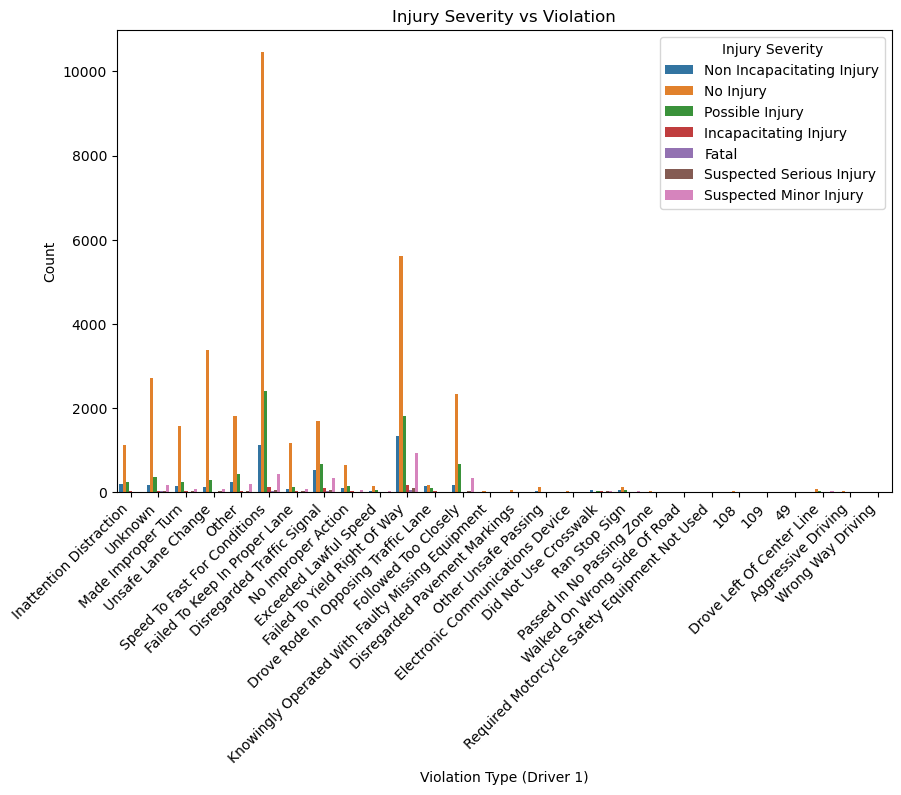

In [51]:
# Filter out rows where either 'Injuryseverity' or 'Violation1_Drv1' is missing
df_filtered = df.dropna(subset=['Injuryseverity', 'Violation1_Drv1'])

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Violation1_Drv1', hue='Injuryseverity', data=df_filtered)
plt.title('Injury Severity vs Violation')
plt.xlabel('Violation Type (Driver 1)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Severity')
plt.show()

C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


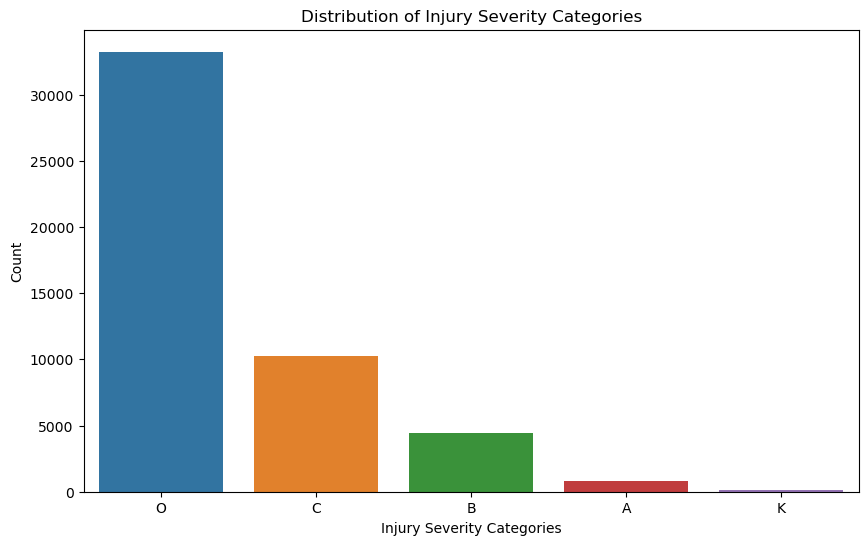

In [52]:
# Map original 'Injuryseverity' categories to new groups
severity_mapping = {
    'Fatal': 'K',
    'Incapacitating Injury': 'A',
    'Suspected Serious Injury': 'A',
    'Non Incapacitating Injury': 'B',
    'Possible Injury': 'C',
    'Suspected Minor Injury': 'C',
    'No Injury': 'O'
}

df['Injury_Category'] = df['Injuryseverity'].map(severity_mapping)

# Create a count plot for the new injury severity categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Injury_Category', data=df, order=df['Injury_Category'].value_counts().index)
plt.title('Distribution of Injury Severity Categories')
plt.xlabel('Injury Severity Categories')
plt.ylabel('Count')
plt.show()

In [53]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,Hour,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude,Injury_Category
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,7,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210,B
1,2,2593420,2012-01-01 11:45:00+00:00,2012,1,1,11:45:00,11,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,33.423190,-111.937690,O
2,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,18,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960,O
3,4,2584449,2012-01-02 00:03:00+00:00,2012,1,2,00:03:00,0,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.417790,-111.947910,O
4,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48877,48878,4073065,2023-08-11 23:59:00+00:00,2023,8,11,23:59:00,23,Baseline Rd,I-10 Exit 155 A1-Ramp,93.000,Intersection T Inter 203,0.0,0.0,No Injury,Sideswipe Same Direction,Daylight,Clear,Unknown,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.378267,-111.968937,O
48878,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,17,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005,O
48879,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,23,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763,C
48880,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,3,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075,O


C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

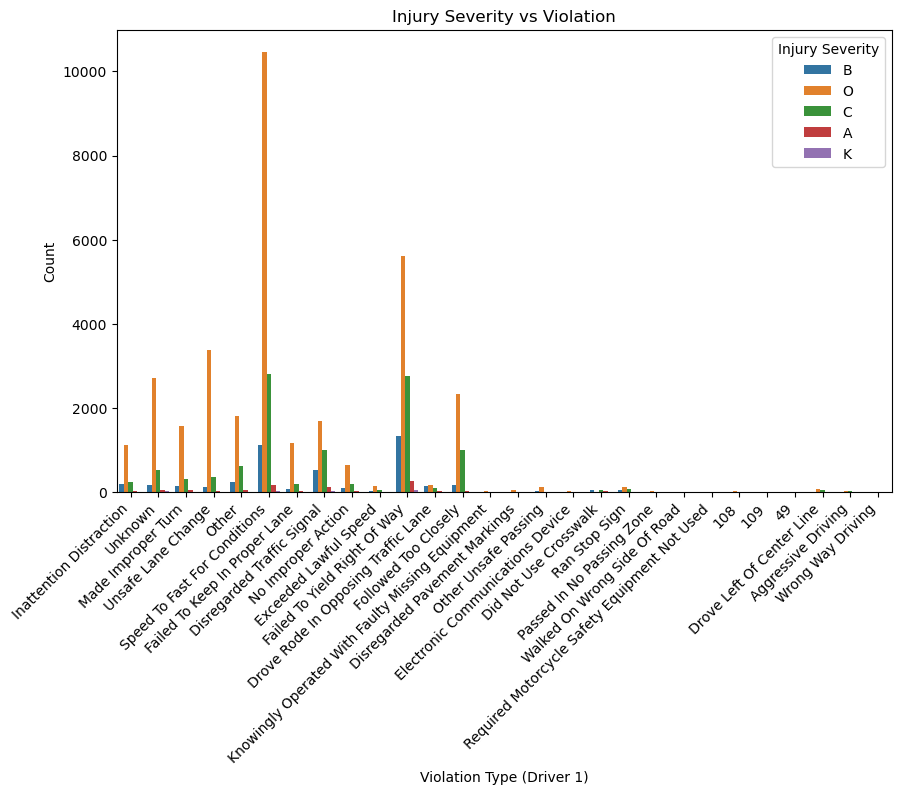

In [55]:
# Filter out rows where either 'Injuryseverity' or 'Violation1_Drv1' is missing
df_filtered = df.dropna(subset=['Injury_Category', 'Violation1_Drv1'])

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Violation1_Drv1', hue='Injury_Category', data=df_filtered)
plt.title('Injury Severity vs Violation')
plt.xlabel('Violation Type (Driver 1)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Severity')
plt.show()